<a href="https://colab.research.google.com/github/autumnliaves/Proyecto_machine_learning/blob/main/PESO_POLLOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV,cross_validate
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import SGDRegressor, SGDClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,make_scorer,median_absolute_error
from scipy import stats
from sklearn.decomposition import PCA
from IPython.display import display
import ipywidgets as widgets
import xgboost as xgb

In [ ]:
#Leer el dataset
archivo_csv = '/content/datos_granja_ok 1.csv'
df = pd.read_csv(archivo_csv,sep=';')
df

,Fecha,CO,Ciudad,Temperatura,Depto,Consumo,PesoGr,Unidades,Edad,Sexo,...,Densidad,HorasLuz,Ventilacion,CalidadCama,Genetica,consumoAgua,TipoAlimento,Conversion,Peso,TipoPollo
0,17/07/2024,E45,Fusagasuga,21,Cundinamarca,695.250000,69.130954,10057.0,31,machos,...,13,16,0,2,0,0.47,N,0,1.718,Grande
1,17/07/2024,E45,Fusagasuga,21,Cundinamarca,695.250000,69.130954,10057.0,31,hembras,...,13,16,0,5,0,0.47,N,0,1.718,Grande
2,17/07/2024,E45,Fusagasuga,21,Cundinamarca,676.812500,92.739449,7298.0,31,machos,...,13,16,0,4,0,0.47,N,0,1.943,Grande
3,17/07/2024,E45,Fusagasuga,21,Cundinamarca,676.812500,92.739449,7298.0,31,hembras,...,13,16,0,2,0,0.47,N,0,1.943,Grande
4,17/07/2024,E08,Sasaima,26,Cundinamarca,196.575758,66.031494,2977.0,32,hembras,...,13,16,0,5,0,0.37,N,0,1.598,Comercial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,17/10/2024,E25,Restrepo,29,Meta,577.322581,76.761412,7521.0,30,machos,...,18,16,0,2,0,0.52,N,0,1.817,Grande
1753,17/10/2024,E25,Restrepo,29,Meta,577.322581,76.761412,7521.0,30,hembras,...,18,16,0,3,0,0.52,N,0,1.817,Grande
1754,17/10/2024,E25,Restrepo,29,Meta,577.322581,76.761412,7521.0,30,hembras,...,18,16,0,1,0,0.52,N,0,1.817,Grande
1755,17/10/2024,E25,Restrepo,29,Meta,577.322581,76.761412,7521.0,30,hembras,...,18,16,0,1,0,0.52,N,0,1.817,Grande


In [ ]:
df = df.drop(columns=['TipoPollo'])  ## Eliminamos la varible tipo pollo

In [ ]:
df.describe()

,Temperatura,Consumo,PesoGr,Unidades,Edad,Humedad,Densidad,HorasLuz,Ventilacion,CalidadCama,Genetica,consumoAgua,Conversion,Peso
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.0,1757.000000,1757.0,1757.000000,1757.0,1757.000000
mean,25.105293,1012.022232,191.707866,10074.742266,30.896414,0.807200,14.647695,13.095048,0.0,2.971542,0.0,0.542710,0.0,1.735418
std,5.577857,2472.231794,3206.942320,8743.540596,4.896023,0.036029,2.350898,6.169453,0.0,1.403822,0.0,0.127643,0.0,0.413089
min,12.000000,-0.736842,-0.005971,6.161000,5.000000,0.680000,13.000000,0.000000,0.0,1.000000,0.0,0.281000,0.0,0.155000
25%,23.000000,444.517241,61.960766,6957.000000,28.000000,0.790000,13.000000,16.000000,0.0,2.000000,0.0,0.432000,0.0,1.553000
50%,23.000000,554.451613,69.952001,7521.000000,31.000000,0.800000,13.000000,16.000000,0.0,3.000000,0.0,0.520000,0.0,1.760000
75%,29.000000,714.625000,78.015885,10686.000000,33.000000,0.830000,18.000000,16.000000,0.0,4.000000,0.0,0.660000,0.0,1.929000
max,34.000000,22939.926190,133848.567700,123412.000000,45.000000,0.970000,18.000000,16.000000,0.0,5.000000,0.0,0.770000,0.0,7.000000


In [ ]:
df.dtypes

,0
Fecha,object
CO,object
Ciudad,object
Temperatura,int64
Depto,object
Consumo,float64
PesoGr,float64
Unidades,float64
Edad,int64
Sexo,object


In [ ]:
df.isnull().sum()

,0
Fecha,0
CO,0
Ciudad,0
Temperatura,0
Depto,0
Consumo,0
PesoGr,0
Unidades,0
Edad,0
Sexo,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fecha         1757 non-null   object 
 1   CO            1757 non-null   object 
 2   Ciudad        1757 non-null   object 
 3   Temperatura   1757 non-null   int64  
 4   Depto         1757 non-null   object 
 5   Consumo       1757 non-null   float64
 6   PesoGr        1757 non-null   float64
 7   Unidades      1757 non-null   float64
 8   Edad          1757 non-null   int64  
 9   Sexo          1757 non-null   object 
 10  TipoGranja    1757 non-null   object 
 11  Humedad       1757 non-null   float64
 12  Densidad      1757 non-null   int64  
 13  HorasLuz      1757 non-null   int64  
 14  Ventilacion   1757 non-null   int64  
 15  CalidadCama   1757 non-null   int64  
 16  Genetica      1757 non-null   int64  
 17  consumoAgua   1757 non-null   float64
 18  TipoAlimento  1757 non-null 

In [ ]:
df.head()

,Fecha,CO,Ciudad,Temperatura,Depto,Consumo,PesoGr,Unidades,Edad,Sexo,...,Humedad,Densidad,HorasLuz,Ventilacion,CalidadCama,Genetica,consumoAgua,TipoAlimento,Conversion,Peso
0,17/07/2024,E45,Fusagasuga,21,Cundinamarca,695.250000,69.130954,10057.0,31,machos,...,0.77,13,16,0,2,0,0.47,N,0,1.718
1,17/07/2024,E45,Fusagasuga,21,Cundinamarca,695.250000,69.130954,10057.0,31,hembras,...,0.77,13,16,0,5,0,0.47,N,0,1.718
2,17/07/2024,E45,Fusagasuga,21,Cundinamarca,676.812500,92.739449,7298.0,31,machos,...,0.77,13,16,0,4,0,0.47,N,0,1.943
3,17/07/2024,E45,Fusagasuga,21,Cundinamarca,676.812500,92.739449,7298.0,31,hembras,...,0.77,13,16,0,2,0,0.47,N,0,1.943
4,17/07/2024,E08,Sasaima,26,Cundinamarca,196.575758,66.031494,2977.0,32,hembras,...,0.87,13,16,0,5,0,0.37,N,0,1.598


In [ ]:
# Inicializar el codificador de etiquetas
label_encoder = LabelEncoder()

# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Aplicar Label Encoding a cada columna categórica
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Mostrar las primeras filas del DataFrame transformado
df.head()

,Fecha,CO,Ciudad,Temperatura,Depto,Consumo,PesoGr,Unidades,Edad,Sexo,...,Humedad,Densidad,HorasLuz,Ventilacion,CalidadCama,Genetica,consumoAgua,TipoAlimento,Conversion,Peso
0,12,23,4,21,0,695.250000,69.130954,10057.0,31,1,...,0.77,13,16,0,2,0,0.47,0,0,1.718
1,12,23,4,21,0,695.250000,69.130954,10057.0,31,0,...,0.77,13,16,0,5,0,0.47,0,0,1.718
2,12,23,4,21,0,676.812500,92.739449,7298.0,31,1,...,0.77,13,16,0,4,0,0.47,0,0,1.943
3,12,23,4,21,0,676.812500,92.739449,7298.0,31,0,...,0.77,13,16,0,2,0,0.47,0,0,1.943
4,12,2,11,26,0,196.575758,66.031494,2977.0,32,0,...,0.87,13,16,0,5,0,0.37,0,0,1.598


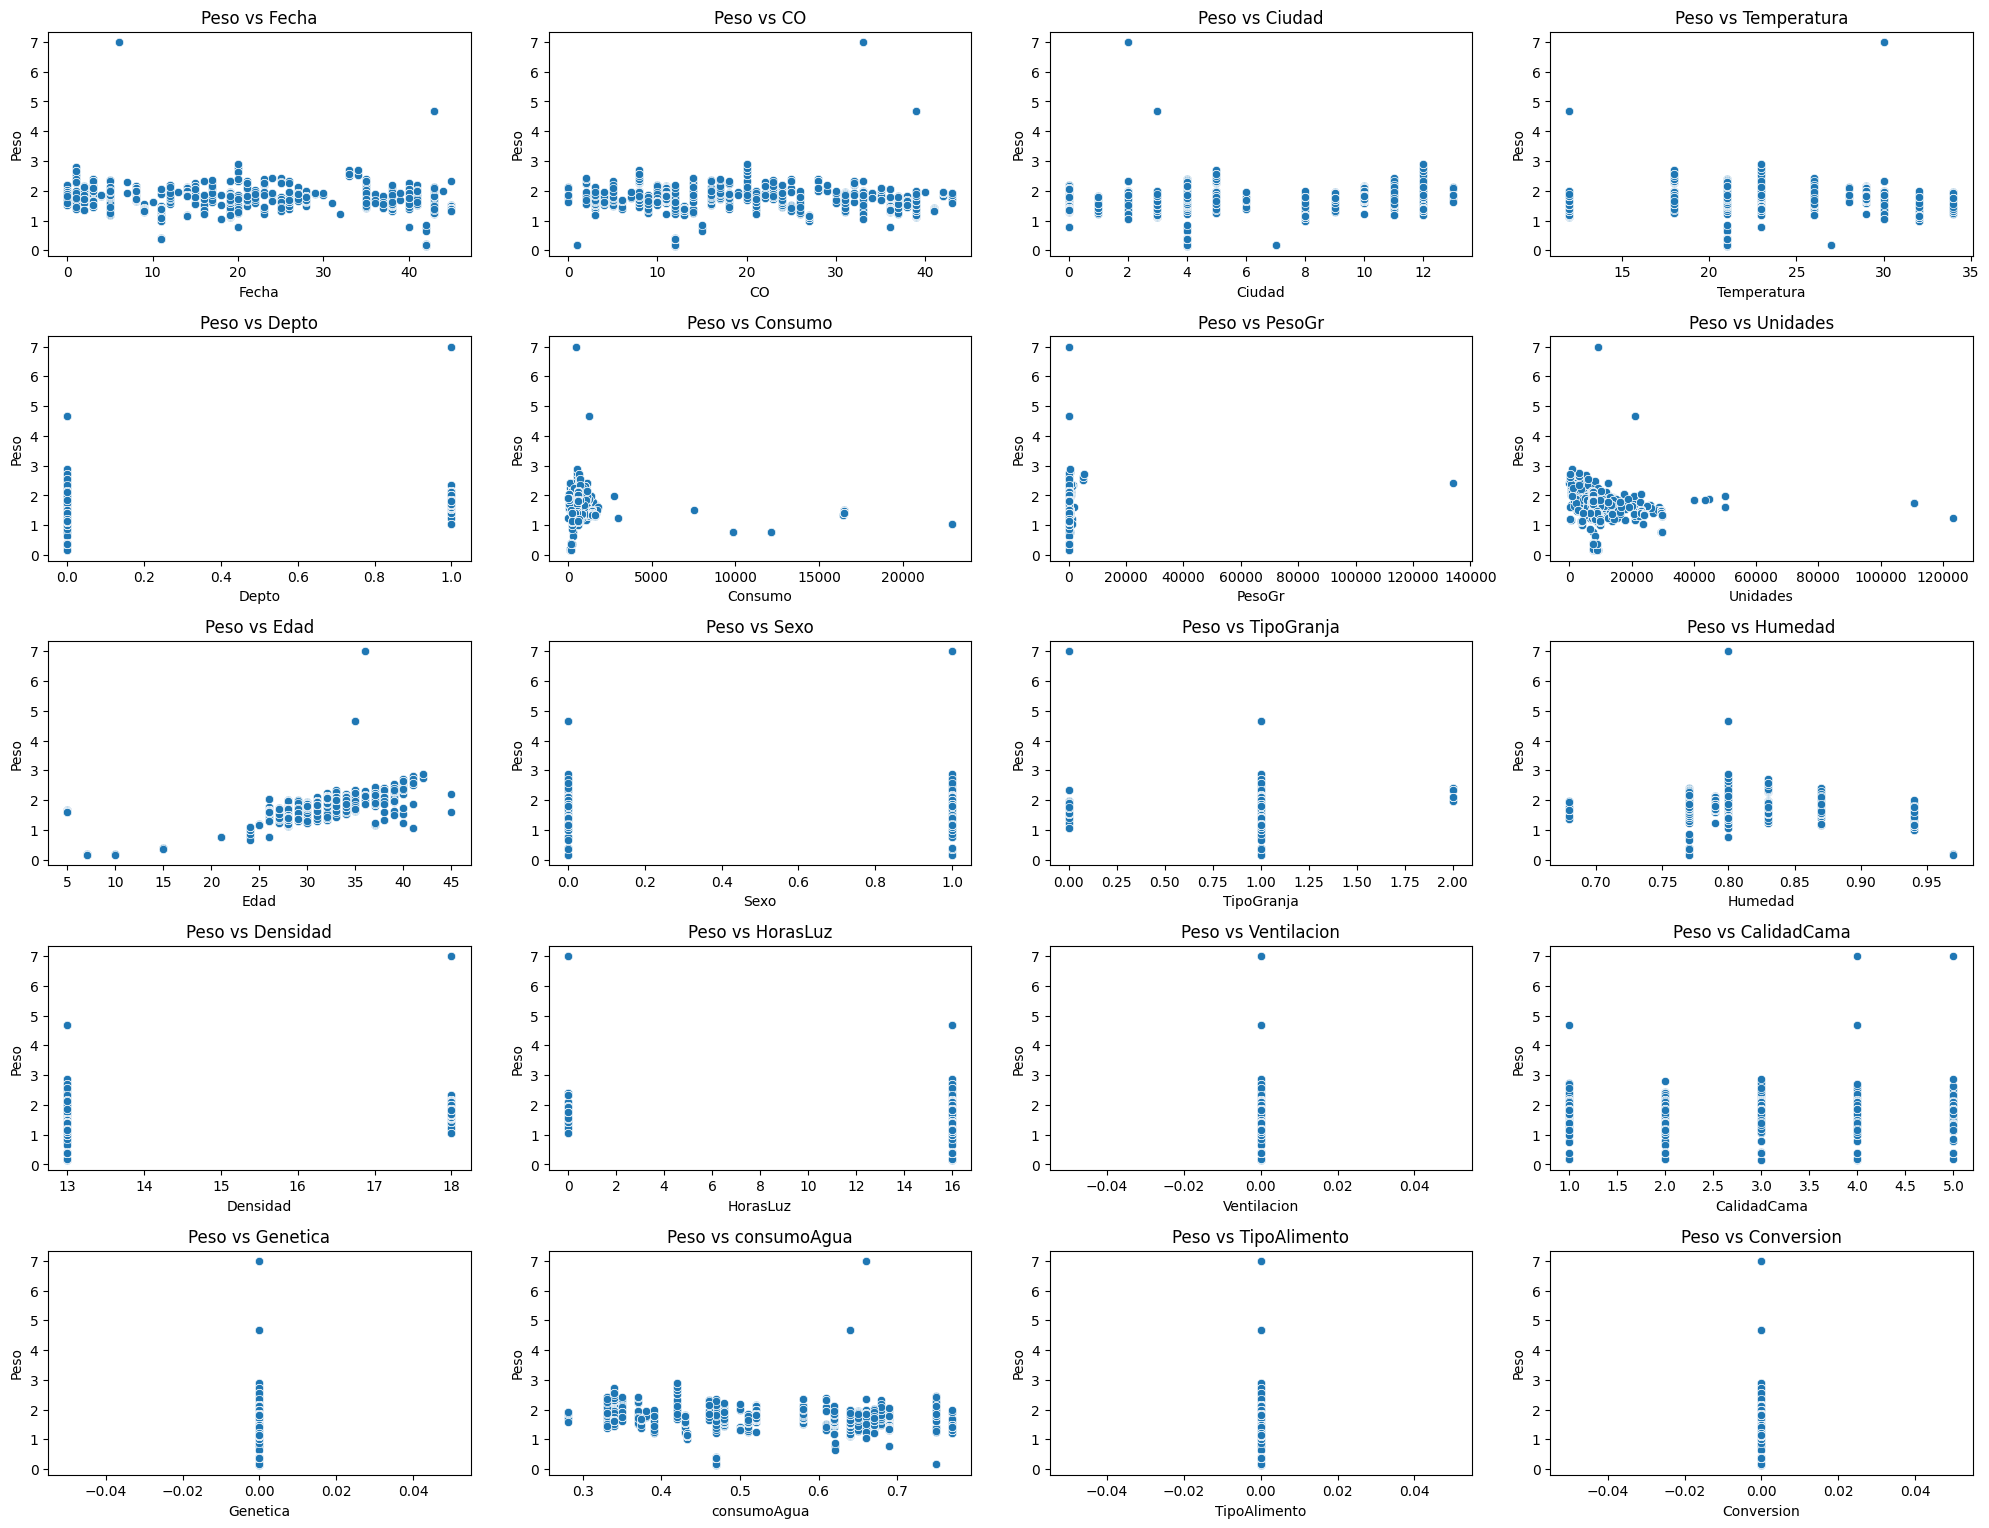

In [ ]:
# Crear gráficos de dispersión de 'Peso' vs todas las otras variables en el conjunto de datos
variables = [col for col in df.columns if col != 'Peso']  # Seleccionar todas las columnas excepto 'Peso'

# Ajustar el tamaño de la cuadrícula para 21 gráficos (6 filas x 4 columnas)
plt.figure(figsize=(20, 18))

# Crear un gráfico de dispersión para 'Peso' vs cada una de las demás variables
for i, var in enumerate(variables, 1):
    plt.subplot(6, 4, i)
    sns.scatterplot(x=var, y='Peso', data=df)
    plt.title(f'Peso vs {var}')

plt.tight_layout()
plt.show()



1. Análisis estadístico de la variable peso

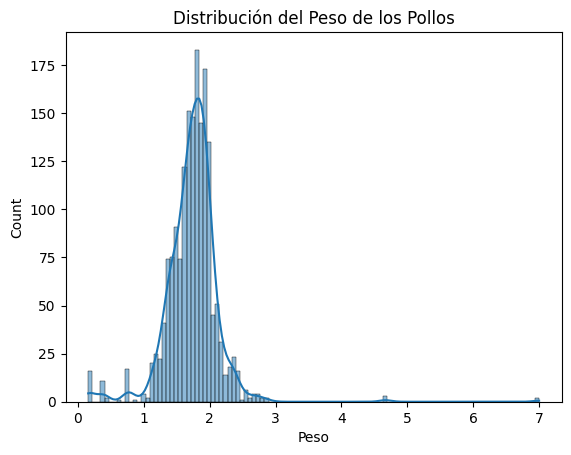

In [ ]:
sns.histplot(df['Peso'], kde=True)
plt.xlabel('Peso')
plt.title('Distribución del Peso de los Pollos')
plt.show()

1. La distribución de los pesos se está concentrando muy cerca del 2, lo que indica que hay muchos pollos con pesos muy similares.

2. Se tiene también una cola a la derecha que puede indicar valores atípicos, debido a que k-means es sensible a estos datos.


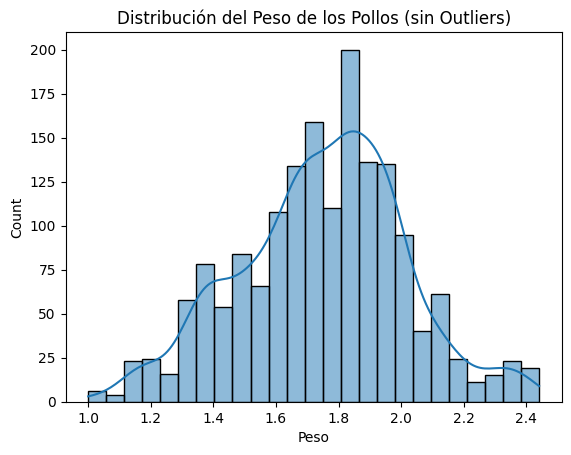

In [ ]:
# Calcular el IQR para la columna Peso
Q1 = df['Peso'].quantile(0.25)
Q3 = df['Peso'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los outliers
df = df[(df['Peso'] >= lower_limit) & (df['Peso'] <= upper_limit)]

# Mostrar la distribución después de eliminar outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Peso'], kde=True)
plt.xlabel('Peso')
plt.title('Distribución del Peso de los Pollos (sin Outliers)')
plt.show()

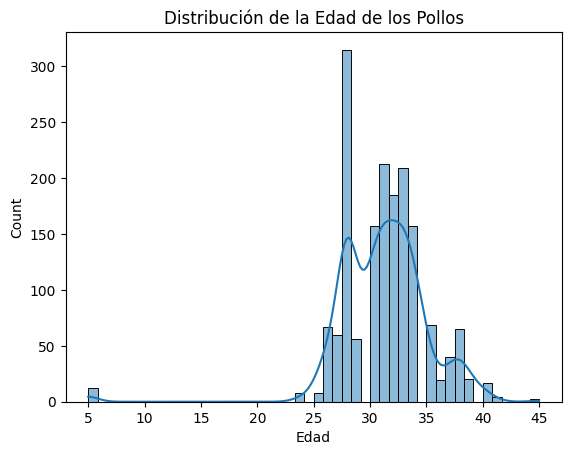

In [ ]:
# Graficar la distribución de la variable Edad
sns.histplot(df['Edad'], kde=True)
plt.xlabel('Edad')
plt.title('Distribución de la Edad de los Pollos')
plt.show()

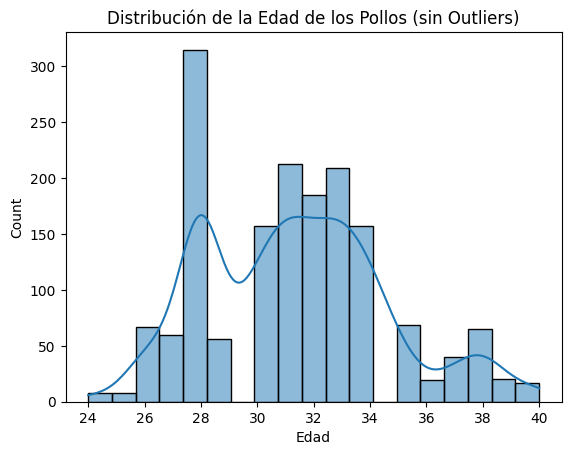

In [ ]:
# Calcular el IQR para la columna Edad
Q1 = df['Edad'].quantile(0.25)
Q3 = df['Edad'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los outliers
df = df[(df['Edad'] >= lower_limit) & (df['Edad'] <= upper_limit)]

# Mostrar la distribución después de eliminar outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Edad'], kde=True)
plt.xlabel('Edad')
plt.title('Distribución de la Edad de los Pollos (sin Outliers)')
plt.show()

In [ ]:
# Eliminar columnas que contienen solo ceros
df = df.loc[:, (df != 0).any(axis=0)]

# Mostrar las columnas restantes para verificar
print("Columnas restantes después de eliminar las que solo tienen ceros:")
print(df.columns)

Columnas restantes después de eliminar las que solo tienen ceros:
Index(['Fecha', 'CO', 'Ciudad', 'Temperatura', 'Depto', 'Consumo', 'PesoGr',
       'Unidades', 'Edad', 'Sexo', 'TipoGranja', 'Humedad', 'Densidad',
       'HorasLuz', 'CalidadCama', 'consumoAgua', 'Peso'],
      dtype='object')


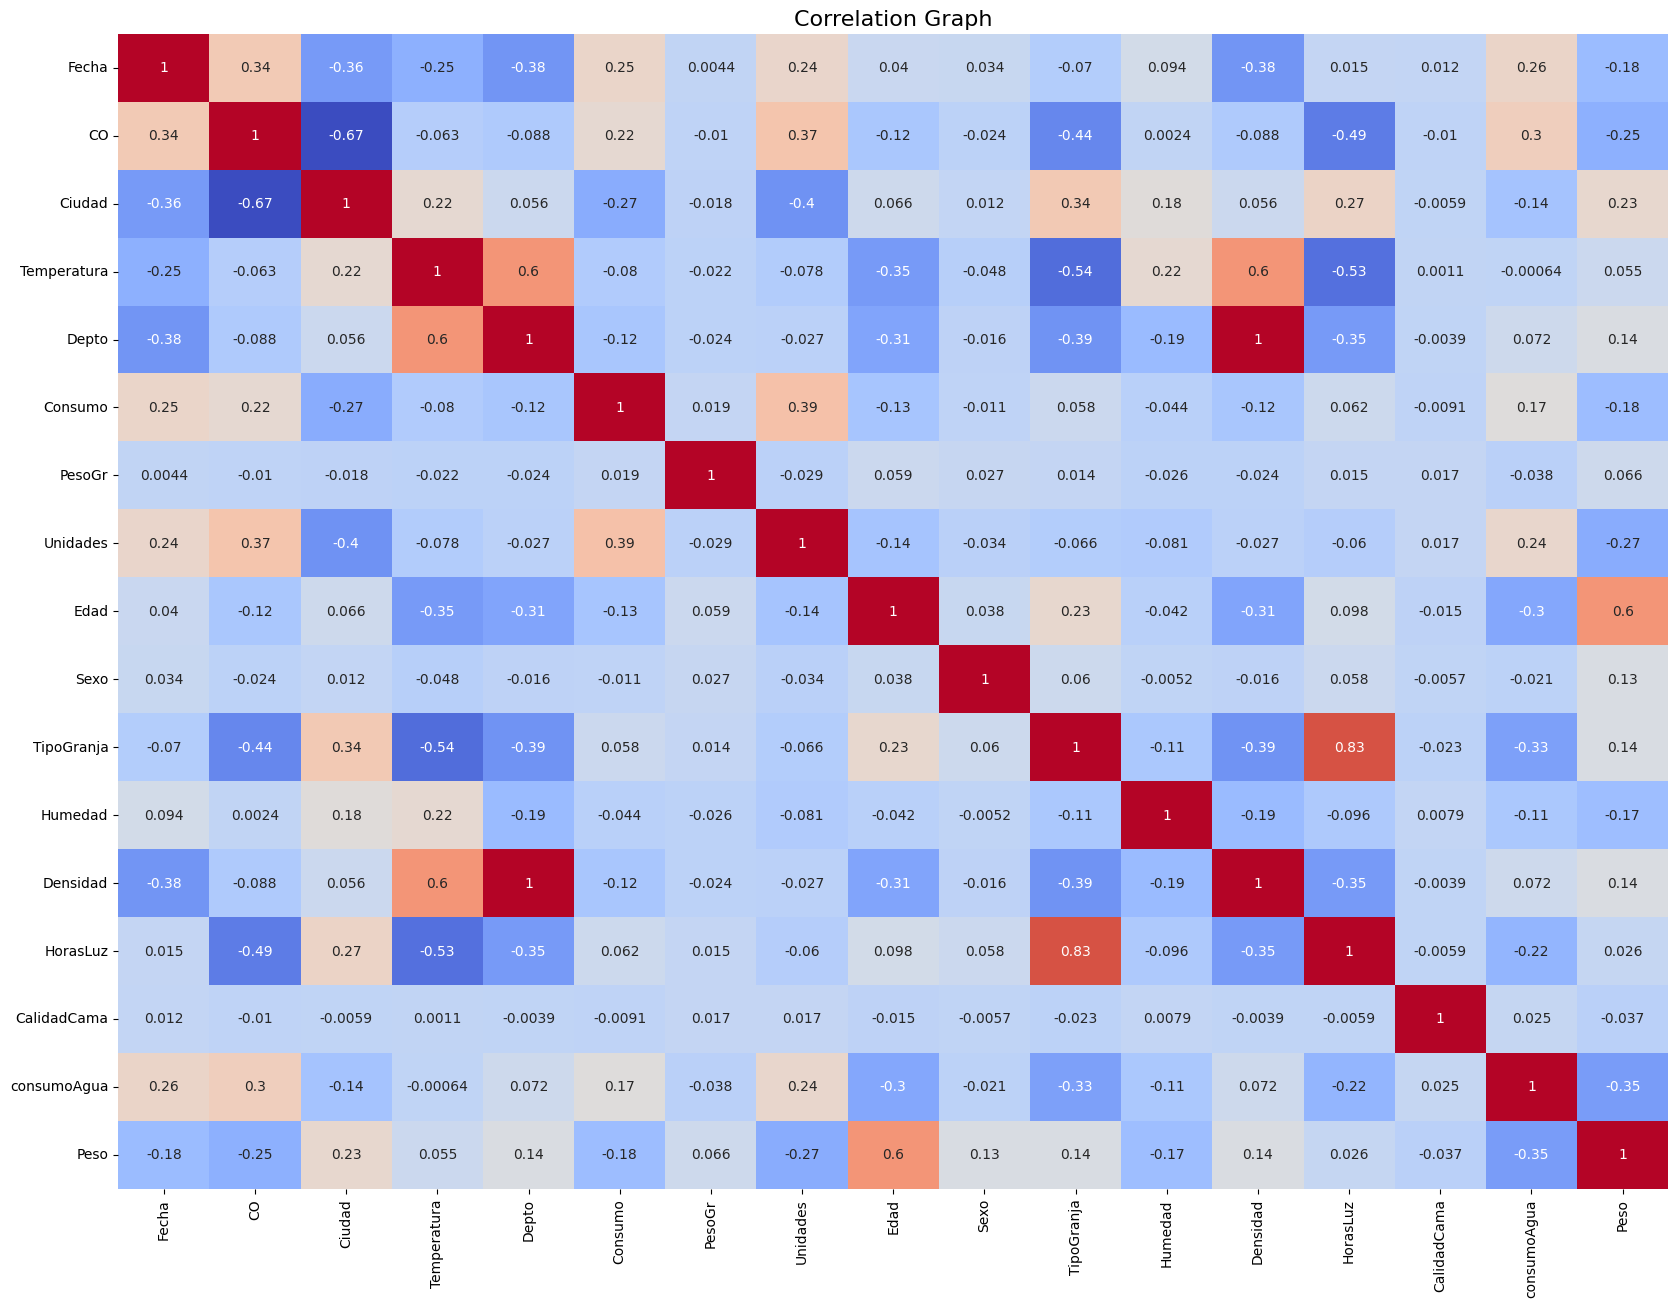

In [ ]:
plt.figure (figsize = [20,15] ,  dpi = 100 )
plt.title ("Correlation Graph" , fontsize = 16)
sns.heatmap (df.corr(), annot = True, cmap = 'coolwarm', cbar = False)
plt.show ()

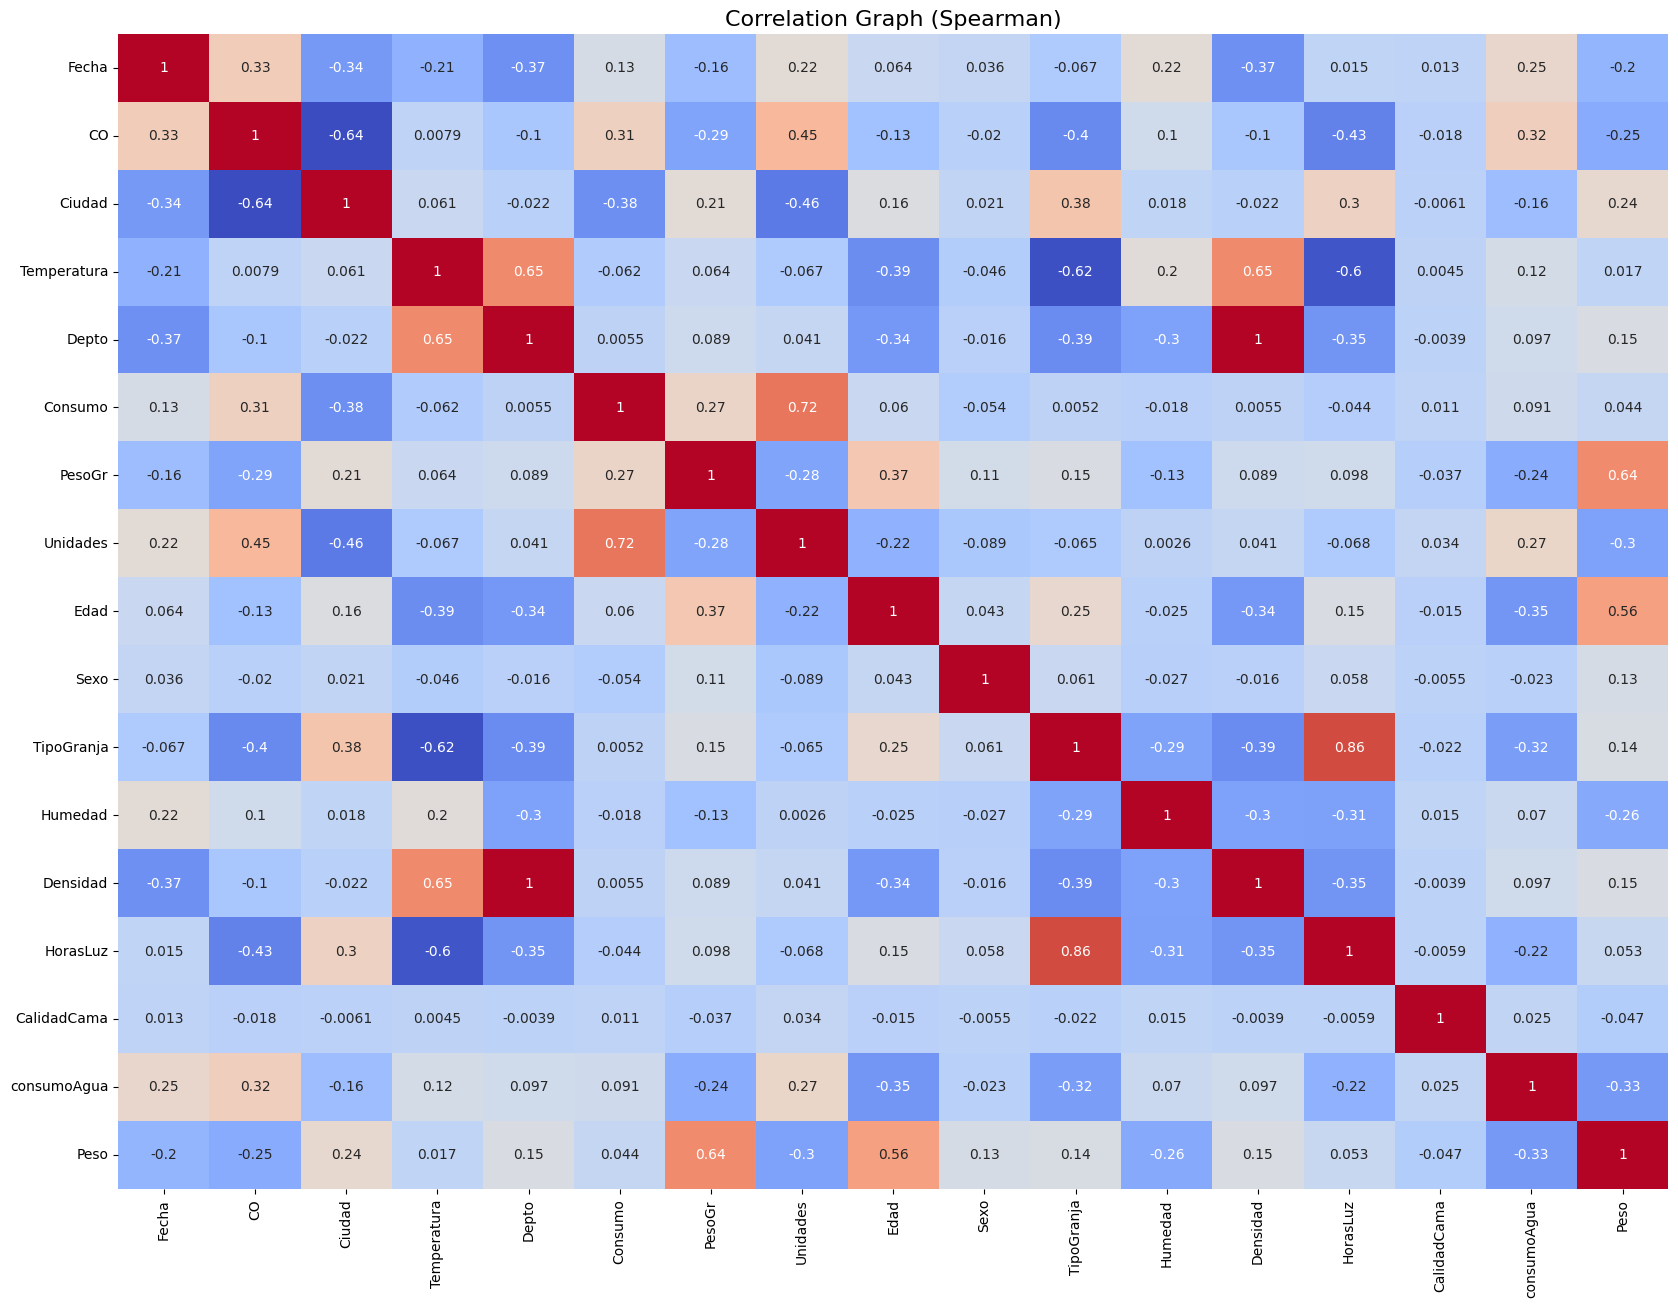

In [ ]:

# Calcular la matriz de correlación utilizando el método de Spearman
correlation_spearman = df.corr(method='spearman')

# Graficar la matriz de correlación
plt.figure(figsize=(20, 15), dpi=100)
plt.title("Correlation Graph (Spearman)", fontsize=16)
sns.heatmap(correlation_spearman, annot=True, cmap='coolwarm', cbar=False)
plt.show()

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Peso', 'Edad']])
df_scaled = scaler.fit_transform(df)

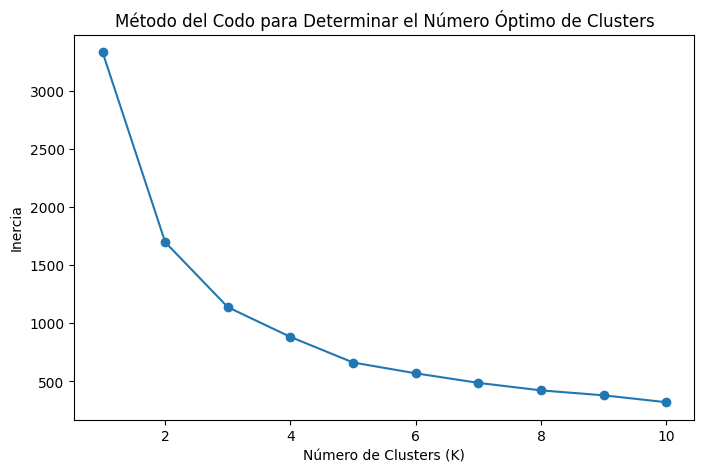

In [ ]:
# Lista para almacenar las inercias
inercias = []

# Probar diferentes valores de K (por ejemplo, de 1 a 10 clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)  # df_selected debe contener solo las variables seleccionadas
    inercias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inercias, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

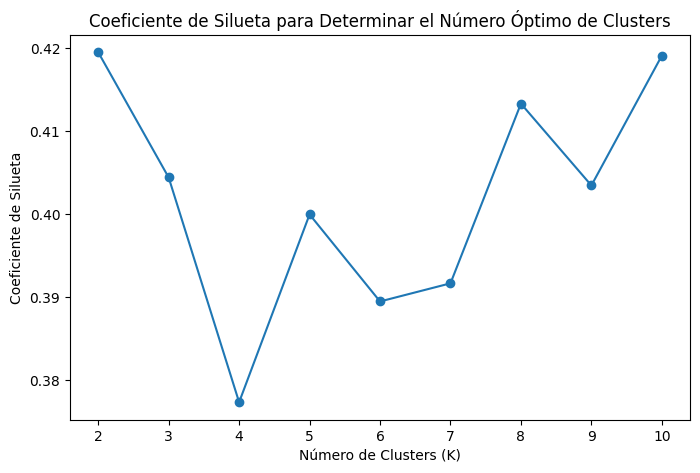

In [ ]:
from sklearn.metrics import silhouette_score

# Lista para almacenar los puntajes de silueta
silhouette_scores = []

# Probar diferentes valores de K (por ejemplo, de 2 a 10 clusters)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el puntaje de silueta para cada K
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Coeficiente de Silueta')
plt.title('Coeficiente de Silueta para Determinar el Número Óptimo de Clusters')
plt.show()

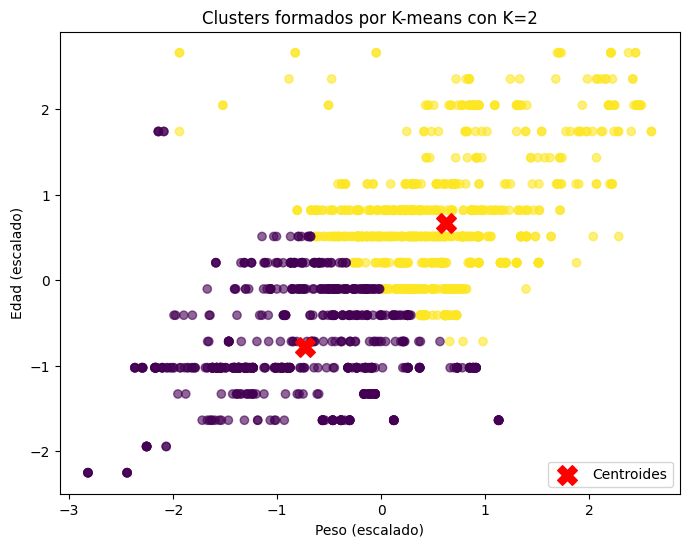

Inercia: 1695.9635927360023
Silhouette Score: 0.41458782475552397
Davies-Bouldin Score: 0.8891189128424433


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Crear el modelo K-means con K=2
kmeans = KMeans(n_clusters=2, random_state=42)

# Entrenar el modelo con los datos escalados
kmeans.fit(X_scaled)

# Predecir los clústeres
y_kmeans = kmeans.predict(X_scaled)

# Visualización de los clústeres formados con las dos variables (Peso y Edad)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.title("Clusters formados por K-means con K=2")
plt.xlabel("Peso (escalado)")
plt.ylabel("Edad (escalado)")
plt.legend()
plt.show()

# Calcular las métricas de evaluación

# Inercia
inertia = kmeans.inertia_
print("Inercia:", inertia)

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print("Silhouette Score:", silhouette_avg)

# Davies-Bouldin Score
db_score = davies_bouldin_score(X_scaled, y_kmeans)
print("Davies-Bouldin Score:", db_score)

Probamos solo con variable peso.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Peso']])
df_scaled = scaler.fit_transform(df)

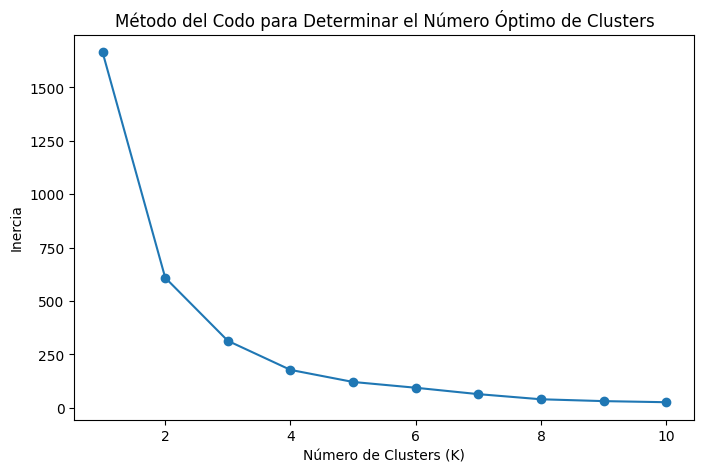

In [ ]:
# Lista para almacenar las inercias
inercias = []

# Probar diferentes valores de K (por ejemplo, de 1 a 10 clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)  # df_selected debe contener solo las variables seleccionadas
    inercias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inercias, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.show()

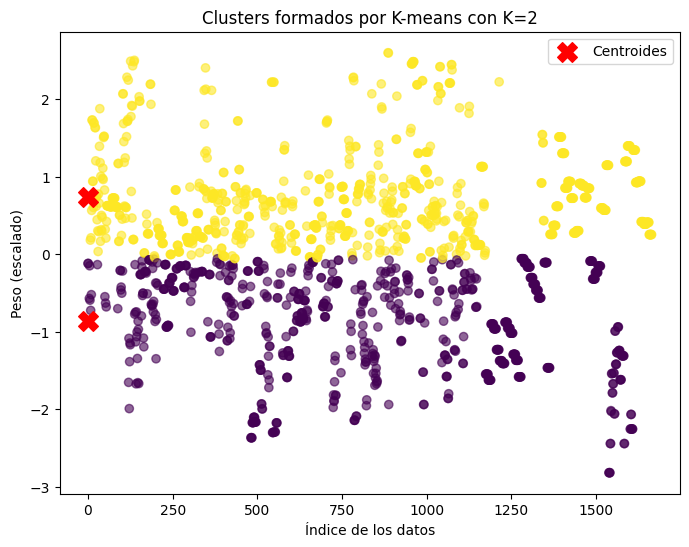

Inercia: 608.4089800062367
Silhouette Score: 0.5532771349346189
Davies-Bouldin Score: 0.6088861228932404


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# Crear el modelo K-means con K=2
kmeans = KMeans(n_clusters=2, random_state=42)

# Entrenar el modelo con los datos de una sola variable (escalados)
kmeans.fit(X_scaled)

# Predecir los clústeres
y_kmeans = kmeans.predict(X_scaled)

# Visualización de los clústeres formados con una sola variable
plt.figure(figsize=(8, 6))
plt.scatter(range(len(X_scaled)), X_scaled[:, 0], c=y_kmeans, cmap='viridis', alpha=0.6)
plt.scatter(range(len(kmeans.cluster_centers_)), kmeans.cluster_centers_[:, 0], s=200, c='red', marker='X', label='Centroides')
plt.title("Clusters formados por K-means con K=2")
plt.xlabel("Índice de los datos")
plt.ylabel("Peso (escalado)")  # Ajusta esto al nombre de tu variable si es diferente
plt.legend()
plt.show()

# Calcular las métricas de evaluación

# Inercia
inertia = kmeans.inertia_
print("Inercia:", inertia)

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print("Silhouette Score:", silhouette_avg)

# Davies-Bouldin Score
db_score = davies_bouldin_score(X_scaled, y_kmeans)
print("Davies-Bouldin Score:", db_score)